In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from keras_visualizer import visualizer 


In [4]:
print(tf.__version__)

2.5.0


In [5]:
!ls

HandsOn_Tensorflow.stud.ipynb my_dir
deep_model.png                saving
house-prices-data             shallow_model.png
model.png                     test.ipynb


In [6]:
df_data = pd.read_csv("./house-prices-data/house-prices-data.csv")

dataset = df_data.copy()

## Separating Data

In [7]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

dataset_X = dataset.drop(["Id","SalePrice"], axis = 1)
dataset_id = dataset["Id"]
dataset_y = dataset["SalePrice"]

train_dataset_X = train_dataset.drop(["Id","SalePrice"], axis = 1)
train_dataset_id = train_dataset["Id"]
train_dataset_y = train_dataset["SalePrice"]

test_dataset_X = test_dataset.drop(["Id","SalePrice"], axis = 1)
test_dataset_id = test_dataset["Id"]
test_dataset_y = test_dataset["SalePrice"]

# or use the train_test splitter from scikit learn

# Write the example here with sklearn

In [8]:
print("Training dataset has", len(train_dataset_X), "values.")
print("Testing dataset has", len(test_dataset_X), "values.")

Training dataset has 1168 values.
Testing dataset has 292 values.


## Normalization

La normalisation est une transformation de la donnée qui permet de "normaliser" la moyenne et la deviation standard d'une distribution. Pour cela on déplace chaque valeur par l'écart et divisant par la déviation standard. Cela permet de ne pas avoir de valeurs trop de difference entre les differentes features de notre dataset et permet aussi de rendre notre convergence plus stable pour nos modèles. 

In [9]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Id,730.949486,421.221360
MSSubClass,57.572774,42.053072
MSZoning,3.032534,0.631075
LotFrontage,200.055651,3121.409754
LotArea,10549.443493,9906.540386
...,...,...
MoSold,6.366438,2.701544
YrSold,2007.819349,1.318539
SaleType,7.482021,1.585502
SaleCondition,3.761130,1.134621


### The 'old' way : Pandas

In [10]:
def normalize(x, mean, std): 
    return ((x-mean)/std)

In [11]:
def normalizeColumn(df, colName):
    meanVal = df[colName].mean()
    stdVal = df[colName].std()
    print(meanVal, stdVal)

    newCol = df[colName].apply(lambda x: normalize(x,meanVal, stdVal))
    newMean = newCol.mean()
    newStd = newCol.std()
    print(newMean, newStd)
    
    return newCol

In [12]:
normalizeColumn(dataset_X, "MSZoning")

3.0287671232876714 0.6320174410566584
-2.822704018773001e-16 0.9999999999999998


0      -0.045516
1      -0.045516
2      -0.045516
3      -0.045516
4      -0.045516
          ...   
1455   -0.045516
1456   -0.045516
1457   -0.045516
1458   -0.045516
1459   -0.045516
Name: MSZoning, Length: 1460, dtype: float64

We can transform the complete dataset with a simple line

In [13]:
dataset_X-dataset_X.mean()/dataset_X.std()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,58.654929,-1.792221,64.943808,8448.946343,-14.561727,1.62154,-0.92473,-0.026171,2.139336,-0.225639,...,60.295758,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.338311,496.198833,3.159453,0.57489
1,18.654929,-1.792221,79.943808,9598.946343,-14.561727,1.62154,-0.92473,-0.026171,0.139336,-0.225639,...,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.661689,495.198833,3.159453,0.57489
2,58.654929,-1.792221,67.943808,11248.946343,-14.561727,-1.37846,-0.92473,-0.026171,2.139336,-0.225639,...,41.295758,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,6.661689,496.198833,3.159453,0.57489
3,68.654929,-1.792221,59.943808,9548.946343,-14.561727,-1.37846,-0.92473,-0.026171,-1.860664,-0.225639,...,34.295758,271.640798,-0.116299,-0.270116,-0.068668,-0.087658,-0.338311,494.198833,3.159453,-3.42511
4,58.654929,-1.792221,83.943808,14258.946343,-14.561727,-1.37846,-0.92473,-0.026171,0.139336,-0.225639,...,83.295758,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,9.661689,496.198833,3.159453,0.57489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,58.654929,-1.792221,61.943808,7915.946343,-14.561727,1.62154,-0.92473,-0.026171,2.139336,-0.225639,...,39.295758,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,5.661689,495.198833,3.159453,0.57489
1456,18.654929,-1.792221,84.943808,13173.946343,-14.561727,1.62154,-0.92473,-0.026171,2.139336,-0.225639,...,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.338311,498.198833,3.159453,0.57489
1457,68.654929,-1.792221,65.943808,9040.946343,-14.561727,1.62154,-0.92473,-0.026171,2.139336,-0.225639,...,59.295758,-0.359202,-0.116299,-0.270116,-0.068668,2499.912342,2.661689,498.198833,3.159453,0.57489
1458,18.654929,-1.792221,67.943808,9715.946343,-14.561727,1.62154,-0.92473,-0.026171,2.139336,-0.225639,...,-0.704242,111.640798,-0.116299,-0.270116,-0.068668,-0.087658,1.661689,498.198833,3.159453,0.57489


### A bit of help from Scikit Learn?

In [14]:
from sklearn import preprocessing

x = dataset_X.values #returns a numpy array
col = dataset_X.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_dataset_X = pd.DataFrame(x_scaled, columns=col)
normalized_dataset_X.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.217043,0.757192,0.001740,0.043080,0.995890,0.647489,0.925799,0.000685,0.754795,0.031164,...,0.085302,0.039772,0.006712,0.031377,0.003738,0.002806,0.483811,0.453938,0.939127,0.754110
std,0.248827,0.158004,0.030958,0.046653,0.063996,0.469719,0.235889,0.026171,0.405659,0.138116,...,0.121126,0.110723,0.057711,0.116161,0.054441,0.032008,0.245784,0.332024,0.194013,0.220171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.750000,0.000297,0.029229,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000,1.000000,0.800000
50%,0.176471,0.750000,0.000386,0.038227,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.045704,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000,1.000000,0.800000
75%,0.294118,0.750000,0.000475,0.048150,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.124314,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000,1.000000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Normalization with TensorFlow 

Normalization can be added directy in our models so that we don't have to worry about it anymore !

In [15]:
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset_X))
print(normalizer.mean.numpy())

[5.75727577e+01 3.03253508e+00 2.00055664e+02 1.05494443e+04
 9.96575475e-01 1.94606161e+00 2.76626730e+00 8.56164377e-04
 3.06678057e+00 6.07876703e-02 1.23202047e+01 2.03253388e+00
 2.01027393e+00 4.88013774e-01 3.04794431e+00 6.15325212e+00
 5.58647346e+00 1.97117981e+03 1.98508813e+03 1.40924621e+00
 1.07619846e+00 9.56164265e+00 1.03047962e+01 1.76626718e+00
 1.05862999e+02 2.52654076e+00 3.73544526e+00 1.39041102e+00
 2.27911019e+00 2.83304763e+00 2.29623318e+00 2.82191706e+00
 4.43898987e+02 4.74914455e+00 4.65042763e+01 5.75950378e+02
 1.06635352e+03 1.03681505e+00 1.51369882e+00 9.34075296e-01
 3.69948649e+00 1.16843384e+03 3.55280823e+02 6.92465782e+00
 1.53063940e+03 4.29794461e-01 5.65068498e-02 1.56763673e+00
 3.91267031e-01 2.86130071e+00 1.04708874e+00 2.32705450e+00
 6.55308199e+00 5.76027489e+00 6.21575415e-01 3.77910924e+00
 2.51712322e+00 1.88355994e+03 1.27825356e+00 1.78424644e+00
 4.77242340e+02 3.93321848e+00 3.96575356e+00 1.86301351e+00
 9.43647156e+01 4.702567

## Linear Regression

### A shallow network

`keras` used to live as a separate entity from `tensorflow`. It is an interface built on top of `theano` and `tensorflow` to simplify some of their non-beginner-friendly methods. It was integrated inside `tensorflow` in 2019. 

We can use the `tf.keras.Sequential` from the `tf.keras` API to build our first shallow model.

In [16]:
shallow_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

shallow_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 75)                151       
_________________________________________________________________
dense (Dense)                (None, 1)                 76        
Total params: 227
Trainable params: 76
Non-trainable params: 151
_________________________________________________________________


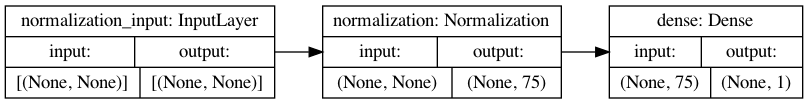

In [17]:
#visualizer(shallow_model, format='png', view=True)
plot_model(shallow_model, to_file='shallow_model.png', show_shapes=True, rankdir='LR')

In [18]:
shallow_model.predict(train_dataset_X)

array([[ 1.1477032 ],
       [ 0.653255  ],
       [ 0.284119  ],
       ...,
       [-1.1726041 ],
       [-0.90147614],
       [ 0.99377835]], dtype=float32)

In [19]:
shallow_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.8),
    loss='mean_absolute_error')

In [20]:
%%time
history = shallow_model.fit(
    train_dataset_X, train_dataset_y,
    epochs=5000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 6min 16s, sys: 49.1 s, total: 7min 5s
Wall time: 5min 17s


In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
9995,17057.550781,17856.175781,9995
9996,17057.898438,17855.779297,9996
9997,17057.585938,17853.558594,9997
9998,17057.224609,17852.552734,9998
9999,17057.417969,17854.357422,9999


In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error J')
  plt.legend()
  plt.grid(True)

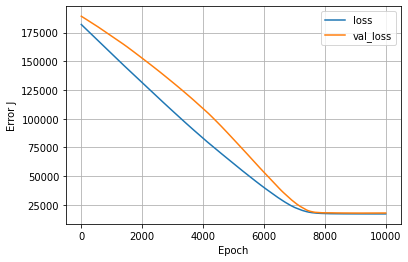

In [23]:
plot_loss(history)

In [23]:
train_dataset_hat_y = shallow_model.predict(train_dataset_X)

In [24]:
 test_cost = shallow_model.evaluate(
    test_dataset_X, test_dataset_y, verbose=0)

print("Error at testing is : ", test_cost)

Error at testing is :  17413.724609375


In [25]:
def f(x):
    val = x
    valUp = val + 1

    prediction = shallow_model.predict(test_dataset_X[val:valUp])[0][0]

    print("For example prediction for the house",x ,"is", prediction, "and its real price is", test_dataset_y[val:valUp].values[0])
    print("The price difference is", test_dataset_y[val:valUp].values[0] - prediction, "$")

    plt.bar(["Objective", "Prediction"], [test_dataset_y[val:valUp].values[0], prediction])
    plt.ylim([0,test_dataset_y.max()])




lenTestset = len(test_dataset_X)-1
interact(f, x=widgets.IntSlider(min=0, max=lenTestset, step=1, value=0))
plt.show()


interactive(children=(IntSlider(value=0, description='x', max=291), Output()), _dom_classes=('widget-interact'…

## Deep Neural Networks

explanations

In [112]:
deep_model_long = keras.Sequential([
      normalizer,
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

deep_model_long.compile(loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.Adam(0.001))

In [113]:
deep_model_long.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 75)                151       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               9728      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 51,224
Trainable params: 51,073
Non-trainable params: 151
________________________________________________

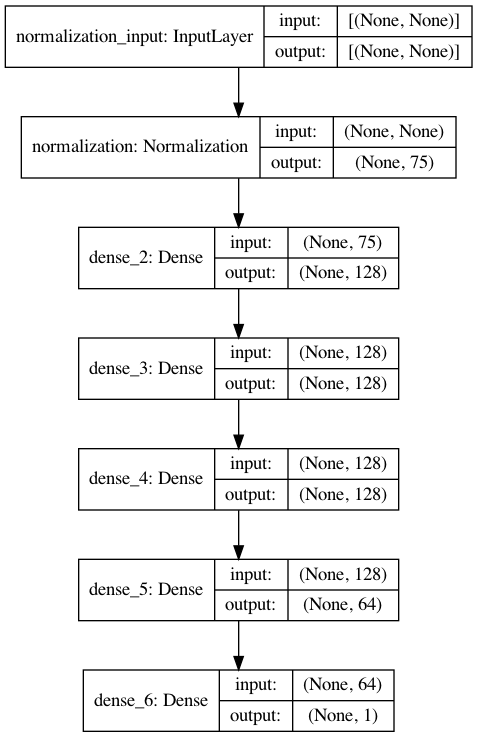

In [114]:
plot_model(deep_model_long, to_file='deep_model.png', show_shapes=True)

In [115]:
%%time
history = deep_model_long.fit(
    train_dataset_X, train_dataset_y,
    validation_split=0.2,
    verbose=0, epochs=10)

CPU times: user 1.22 s, sys: 535 ms, total: 1.76 s
Wall time: 838 ms


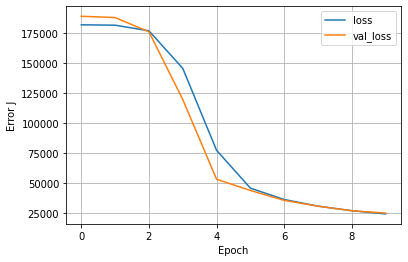

In [116]:
plot_loss(history)

In [117]:
for i in range(1, 30):
    
    history = deep_model_long.fit(
    train_dataset_X, train_dataset_y,
    validation_split=0.2,
    verbose=0, epochs=10)
    
    test_cost = deep_model_long.evaluate(
    test_dataset_X, test_dataset_y, verbose=0)

    print("Error at testing is : ", test_cost)

Error at testing is :  50390.80078125
Error at testing is :  46493.2265625
Error at testing is :  44085.1796875
Error at testing is :  41775.453125
Error at testing is :  39895.96484375
Error at testing is :  38584.0078125
Error at testing is :  37690.69921875
Error at testing is :  36371.6796875
Error at testing is :  35617.53515625
Error at testing is :  35459.4921875
Error at testing is :  35079.26171875
Error at testing is :  35188.8046875
Error at testing is :  35322.765625
Error at testing is :  35069.25
Error at testing is :  34878.51171875
Error at testing is :  34963.59765625
Error at testing is :  34957.19140625
Error at testing is :  35273.70703125
Error at testing is :  35127.43359375
Error at testing is :  35232.59765625
Error at testing is :  35515.796875
Error at testing is :  35695.71484375
Error at testing is :  35454.9375
Error at testing is :  36114.47265625
Error at testing is :  35807.625
Error at testing is :  35967.828125
Error at testing is :  35680.12109375
Err

In [118]:
np.abs(deep_model_long.predict(test_dataset_X) - test_dataset_y.values).mean()

86704.17672601787

In [119]:
deep_model = keras.Sequential([
      normalizer,
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

deep_model.compile(loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.Adam(0.01))

history = deep_model.fit(
    train_dataset_X, train_dataset_y,
    validation_split=0.2,
    verbose=0, epochs=10)

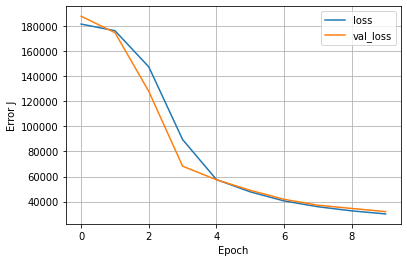

In [120]:
plot_loss(history)

In [121]:
whileFlag = True
upBoundary = 1000000000

while whileFlag:
    
    history = deep_model.fit(
    train_dataset_X, train_dataset_y,
    validation_split=0.2,
    verbose=0, epochs=10)
    
    test_cost = deep_model.evaluate(
    test_dataset_X, test_dataset_y, verbose=0)

    print("Error at testing is : ", test_cost)
    if(upBoundary > test_cost):
        upBoundary = test_cost
    else: 
        whileFlag = False

Error at testing is :  54218.125
Error at testing is :  48657.90234375
Error at testing is :  42716.625
Error at testing is :  39030.02734375
Error at testing is :  35821.11328125
Error at testing is :  33971.7890625
Error at testing is :  33129.64453125
Error at testing is :  32150.69140625
Error at testing is :  31845.41796875
Error at testing is :  31189.064453125
Error at testing is :  30886.462890625
Error at testing is :  30876.71875
Error at testing is :  31031.517578125


In [123]:
np.abs(deep_model.predict(test_dataset_X) - test_dataset_y.values).mean()

84040.62334942796

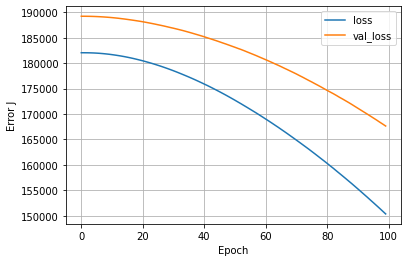

In [33]:
deep_model_short = keras.Sequential([
      normalizer,
      layers.Dense(64),
      layers.Dense(1)
  ])

deep_model_short.compile(
    loss='mean_absolute_error',
    optimizer=tf.optimizers.Adam(learning_rate=0.005)
)

history = deep_model_short.fit(
    train_dataset_X, train_dataset_y,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [34]:
whileFlag = True
upBoundary = 1000000000

while whileFlag:
    
    history = deep_model_short.fit(
    train_dataset_X, train_dataset_y,
    validation_split=0.2,
    verbose=0, epochs=2)
    
    test_cost = deep_model_short.evaluate(
    test_dataset_X, test_dataset_y, verbose=0)


    print("Cost is ", np.mean(history.history['loss']), "Error at testing is : ", test_cost)
    print()
    if(upBoundary > test_cost):
        upBoundary = test_cost
    else: 
        whileFlag = False

Cost is  149528.078125 Error at testing is :  138567.984375

Cost is  148392.03125 Error at testing is :  137632.84375

Cost is  147248.6328125 Error at testing is :  136648.078125

Cost is  146097.90625 Error at testing is :  135647.515625

Cost is  144948.4609375 Error at testing is :  134657.3125

Cost is  143760.4765625 Error at testing is :  133608.890625

Cost is  142581.1015625 Error at testing is :  132593.21875

Cost is  141379.9140625 Error at testing is :  131515.1875

Cost is  140167.3515625 Error at testing is :  130372.0390625

Cost is  138931.859375 Error at testing is :  129199.9140625

Cost is  137694.2734375 Error at testing is :  128034.234375

Cost is  136440.0546875 Error at testing is :  126841.1484375

Cost is  135162.609375 Error at testing is :  125744.765625

Cost is  133878.09375 Error at testing is :  124515.984375

Cost is  132576.2890625 Error at testing is :  123353.1484375

Cost is  131275.2734375 Error at testing is :  122164.109375

Cost is  129945.171

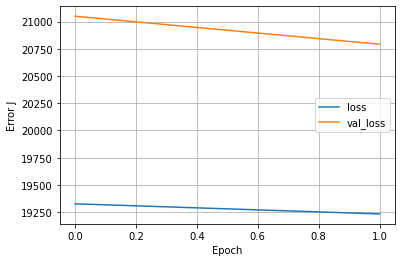

In [35]:
plot_loss(history)

## TF utilities

### Saving models

#### Saving checkpoints during training

In [27]:
# Renseigner le chemin et le nom du fichier de sauvegarde
checkpoint_path = "./saving/model_cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Création d'un checkpoint 
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [41]:
deep_model_short = keras.Sequential([
      normalizer,
      layers.Dense(64),
      layers.Dense(1)
  ])

deep_model_short.compile(
    loss='mean_absolute_error',
    optimizer=tf.optimizers.Adam(learning_rate=0.005)
)




whileFlag = True
upBoundary = 1000000000
all_hist = []

while whileFlag:
    
    history = deep_model_short.fit(
    train_dataset_X, train_dataset_y,
    validation_split=0.2,
    verbose=0, epochs=10,
    callbacks=[cp_callback])
    
    all_hist.append(history)
    
    test_cost = deep_model_short.evaluate(
    test_dataset_X, test_dataset_y, verbose=0)


    print("Cost is ", np.mean(history.history['loss']), "Error at testing is : ", test_cost)
    print()
    if(upBoundary > test_cost):
        upBoundary = test_cost
    else: 
        whileFlag = False
        
plot_loss(all_hist)


Epoch 00001: saving model to ./saving/model_cp.ckpt

Epoch 00002: saving model to ./saving/model_cp.ckpt

Epoch 00003: saving model to ./saving/model_cp.ckpt

Epoch 00004: saving model to ./saving/model_cp.ckpt

Epoch 00005: saving model to ./saving/model_cp.ckpt

Epoch 00006: saving model to ./saving/model_cp.ckpt

Epoch 00007: saving model to ./saving/model_cp.ckpt

Epoch 00008: saving model to ./saving/model_cp.ckpt

Epoch 00009: saving model to ./saving/model_cp.ckpt

Epoch 00010: saving model to ./saving/model_cp.ckpt
Cost is  181937.36875 Error at testing is :  170349.171875


Epoch 00001: saving model to ./saving/model_cp.ckpt

Epoch 00002: saving model to ./saving/model_cp.ckpt

Epoch 00003: saving model to ./saving/model_cp.ckpt

Epoch 00004: saving model to ./saving/model_cp.ckpt

Epoch 00005: saving model to ./saving/model_cp.ckpt

Epoch 00006: saving model to ./saving/model_cp.ckpt

Epoch 00007: saving model to ./saving/model_cp.ckpt

Epoch 00008: saving model to ./saving/


Epoch 00001: saving model to ./saving/model_cp.ckpt

Epoch 00002: saving model to ./saving/model_cp.ckpt

Epoch 00003: saving model to ./saving/model_cp.ckpt

Epoch 00004: saving model to ./saving/model_cp.ckpt

Epoch 00005: saving model to ./saving/model_cp.ckpt

Epoch 00006: saving model to ./saving/model_cp.ckpt

Epoch 00007: saving model to ./saving/model_cp.ckpt

Epoch 00008: saving model to ./saving/model_cp.ckpt

Epoch 00009: saving model to ./saving/model_cp.ckpt

Epoch 00010: saving model to ./saving/model_cp.ckpt
Cost is  121483.078125 Error at testing is :  111383.890625


Epoch 00001: saving model to ./saving/model_cp.ckpt

Epoch 00002: saving model to ./saving/model_cp.ckpt

Epoch 00003: saving model to ./saving/model_cp.ckpt

Epoch 00004: saving model to ./saving/model_cp.ckpt

Epoch 00005: saving model to ./saving/model_cp.ckpt

Epoch 00006: saving model to ./saving/model_cp.ckpt

Epoch 00007: saving model to ./saving/model_cp.ckpt

Epoch 00008: saving model to ./saving


Epoch 00003: saving model to ./saving/model_cp.ckpt

Epoch 00004: saving model to ./saving/model_cp.ckpt

Epoch 00005: saving model to ./saving/model_cp.ckpt

Epoch 00006: saving model to ./saving/model_cp.ckpt

Epoch 00007: saving model to ./saving/model_cp.ckpt

Epoch 00008: saving model to ./saving/model_cp.ckpt

Epoch 00009: saving model to ./saving/model_cp.ckpt

Epoch 00010: saving model to ./saving/model_cp.ckpt
Cost is  23999.8966796875 Error at testing is :  19253.958984375


Epoch 00001: saving model to ./saving/model_cp.ckpt

Epoch 00002: saving model to ./saving/model_cp.ckpt

Epoch 00003: saving model to ./saving/model_cp.ckpt

Epoch 00004: saving model to ./saving/model_cp.ckpt

Epoch 00005: saving model to ./saving/model_cp.ckpt

Epoch 00006: saving model to ./saving/model_cp.ckpt

Epoch 00007: saving model to ./saving/model_cp.ckpt

Epoch 00008: saving model to ./saving/model_cp.ckpt

Epoch 00009: saving model to ./saving/model_cp.ckpt

Epoch 00010: saving model to ./s

AttributeError: 'list' object has no attribute 'history'

#### Loading Weigths

In [54]:
# Create a basic model instance
new_model = keras.Sequential([
      normalizer,
      layers.Dense(64),
      layers.Dense(1)
  ])

new_model.compile(
    loss='mean_absolute_error',
    optimizer=tf.optimizers.Adam(learning_rate=0.005)
)


# Evaluate the model
test_cost = new_model.evaluate(test_dataset_X, test_dataset_y)
print("Untrained model, cost: {:5.2f}".format(test_cost))

10/10 [==============================] - 0s 611us/step - loss: 170708.7969
Untrained model, cost: 170708.80


In [56]:
# Loads the weights
new_model.load_weights(checkpoint_path)

# Re-evaluate the model
test_cost = new_model.evaluate(test_dataset_X, test_dataset_y)
print("Untrained model, cost: {:5.2f}".format(test_cost))

10/10 [==============================] - 0s 660us/step - loss: 17332.5254
Untrained model, cost: 17332.53


### Keras Tuner

In [24]:
!pip install -q -U keras-tuner

In [25]:
import keras_tuner as kt

In [26]:
# Creating a hyperparameter tuner

def model_builder(hp):
  hp_units = hp.Int('units', min_value = 16, max_value = 128, step=4)
  model = keras.Sequential()
  model.add(normalizer)
  model.add(keras.layers.Dense(units=hp_units, activation ='relu'))
  model.add(keras.layers.Dense(units=hp_units, activation ='relu'))
  model.add(keras.layers.Dense(1))

  # model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
#  model.add(keras.layers.Dense(units=hp_units, activation='relu'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 5e-2, 1e-3])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.MeanSquaredError(),
                metrics=['mean_absolute_error'])

  return model

In [27]:
tuner = kt.Hyperband(model_builder,
                     objective='val_mean_absolute_error',
                     max_epochs=500,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir/intro_to_kt/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [28]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=5)


In [29]:
tuner.search(train_dataset_X, train_dataset_y, epochs=500, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 128 and the optimal learning rate for the optimizer
is 0.1.



In [30]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_dataset_X, train_dataset_y, epochs=500, validation_split=0.2)

Epoch 1/500
30/30 [==============================] - 0s 5ms/step - loss: 20655546368.0000 - mean_absolute_error: 114362.3750 - val_loss: 9164408832.0000 - val_mean_absolute_error: 81914.3281
Epoch 2/500
30/30 [==============================] - 0s 1ms/step - loss: 4455653888.0000 - mean_absolute_error: 48920.1680 - val_loss: 3436964096.0000 - val_mean_absolute_error: 42059.9258
Epoch 3/500
30/30 [==============================] - 0s 1ms/step - loss: 1882919680.0000 - mean_absolute_error: 30833.4160 - val_loss: 1426434304.0000 - val_mean_absolute_error: 27810.9492
Epoch 4/500
30/30 [==============================] - 0s 1ms/step - loss: 1549358464.0000 - mean_absolute_error: 24972.5781 - val_loss: 1354481024.0000 - val_mean_absolute_error: 26830.5840
Epoch 5/500
30/30 [==============================] - 0s 1ms/step - loss: 1286976640.0000 - mean_absolute_error: 23923.1094 - val_loss: 1330212096.0000 - val_mean_absolute_error: 25843.8848
Epoch 6/500
30/30 [==============================] - 

30/30 [==============================] - 0s 2ms/step - loss: 412060960.0000 - mean_absolute_error: 14994.7314 - val_loss: 1419549312.0000 - val_mean_absolute_error: 26616.9863
Epoch 88/500
30/30 [==============================] - 0s 2ms/step - loss: 231231200.0000 - mean_absolute_error: 11259.2061 - val_loss: 1417758208.0000 - val_mean_absolute_error: 25969.4102
Epoch 89/500
30/30 [==============================] - 0s 2ms/step - loss: 148927088.0000 - mean_absolute_error: 8729.7217 - val_loss: 1376929536.0000 - val_mean_absolute_error: 25324.0605
Epoch 90/500
30/30 [==============================] - 0s 1ms/step - loss: 137478656.0000 - mean_absolute_error: 8274.3135 - val_loss: 1366923392.0000 - val_mean_absolute_error: 25616.1074
Epoch 91/500
30/30 [==============================] - 0s 1ms/step - loss: 104220728.0000 - mean_absolute_error: 6840.8442 - val_loss: 1368616320.0000 - val_mean_absolute_error: 25207.7148
Epoch 92/500
30/30 [==============================] - 0s 1ms/step - los

30/30 [==============================] - 0s 1ms/step - loss: 124449880.0000 - mean_absolute_error: 7451.2769 - val_loss: 1628489472.0000 - val_mean_absolute_error: 28085.0664
Epoch 174/500
30/30 [==============================] - 0s 2ms/step - loss: 125095384.0000 - mean_absolute_error: 7631.8828 - val_loss: 1519101952.0000 - val_mean_absolute_error: 26004.5059
Epoch 175/500
30/30 [==============================] - 0s 2ms/step - loss: 110891576.0000 - mean_absolute_error: 7252.0835 - val_loss: 1684307456.0000 - val_mean_absolute_error: 27159.4863
Epoch 176/500
30/30 [==============================] - 0s 1ms/step - loss: 75752432.0000 - mean_absolute_error: 6271.3354 - val_loss: 1481283840.0000 - val_mean_absolute_error: 25763.3496
Epoch 177/500
30/30 [==============================] - 0s 2ms/step - loss: 102891264.0000 - mean_absolute_error: 7213.0405 - val_loss: 1670379264.0000 - val_mean_absolute_error: 27659.4082
Epoch 178/500
30/30 [==============================] - 0s 2ms/step - l

Epoch 260/500
30/30 [==============================] - 0s 2ms/step - loss: 30348644.0000 - mean_absolute_error: 3924.0310 - val_loss: 1539283968.0000 - val_mean_absolute_error: 26101.5586
Epoch 261/500
30/30 [==============================] - 0s 2ms/step - loss: 26123396.0000 - mean_absolute_error: 3806.9868 - val_loss: 1509990528.0000 - val_mean_absolute_error: 26752.7324
Epoch 262/500
30/30 [==============================] - 0s 2ms/step - loss: 33631408.0000 - mean_absolute_error: 4245.9263 - val_loss: 1514071168.0000 - val_mean_absolute_error: 26207.6289
Epoch 263/500
30/30 [==============================] - 0s 1ms/step - loss: 35601952.0000 - mean_absolute_error: 3993.9480 - val_loss: 1541154944.0000 - val_mean_absolute_error: 25840.0273
Epoch 264/500
30/30 [==============================] - 0s 1ms/step - loss: 25714670.0000 - mean_absolute_error: 3506.3711 - val_loss: 1528013696.0000 - val_mean_absolute_error: 25866.9785
Epoch 265/500
30/30 [==============================] - 0s 1m

Epoch 347/500
30/30 [==============================] - 0s 2ms/step - loss: 58438268.0000 - mean_absolute_error: 5748.5503 - val_loss: 1582958336.0000 - val_mean_absolute_error: 27040.9941
Epoch 348/500
30/30 [==============================] - 0s 2ms/step - loss: 64997512.0000 - mean_absolute_error: 5851.4819 - val_loss: 1554785024.0000 - val_mean_absolute_error: 27001.4590
Epoch 349/500
30/30 [==============================] - 0s 2ms/step - loss: 39672300.0000 - mean_absolute_error: 4653.9111 - val_loss: 1550423424.0000 - val_mean_absolute_error: 26503.0254
Epoch 350/500
30/30 [==============================] - 0s 1ms/step - loss: 34071768.0000 - mean_absolute_error: 4068.6833 - val_loss: 1555952512.0000 - val_mean_absolute_error: 26337.9277
Epoch 351/500
30/30 [==============================] - 0s 1ms/step - loss: 41862968.0000 - mean_absolute_error: 4747.7837 - val_loss: 1508065536.0000 - val_mean_absolute_error: 26657.4805
Epoch 352/500
30/30 [==============================] - 0s 1m

Epoch 434/500
30/30 [==============================] - 0s 2ms/step - loss: 36995316.0000 - mean_absolute_error: 4337.1167 - val_loss: 1407920512.0000 - val_mean_absolute_error: 24936.4961
Epoch 435/500
30/30 [==============================] - 0s 2ms/step - loss: 39510080.0000 - mean_absolute_error: 4468.1602 - val_loss: 1633739392.0000 - val_mean_absolute_error: 26747.3965
Epoch 436/500
30/30 [==============================] - 0s 2ms/step - loss: 32739922.0000 - mean_absolute_error: 4227.4897 - val_loss: 1460574976.0000 - val_mean_absolute_error: 25749.7344
Epoch 437/500
30/30 [==============================] - 0s 2ms/step - loss: 32374100.0000 - mean_absolute_error: 4145.8521 - val_loss: 1608584576.0000 - val_mean_absolute_error: 26724.4121
Epoch 438/500
30/30 [==============================] - 0s 2ms/step - loss: 35239868.0000 - mean_absolute_error: 4354.3965 - val_loss: 1469657088.0000 - val_mean_absolute_error: 25868.2070
Epoch 439/500
30/30 [==============================] - 0s 2m

In [31]:
val_acc_per_epoch = history.history['val_mean_absolute_error']
best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 18


In [32]:
def plot_loss_custom(history):
  plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
  plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_error')
  plt.xlabel('Epoch')
  plt.ylabel('Error J')
  
  plt.legend()
  plt.grid(True)

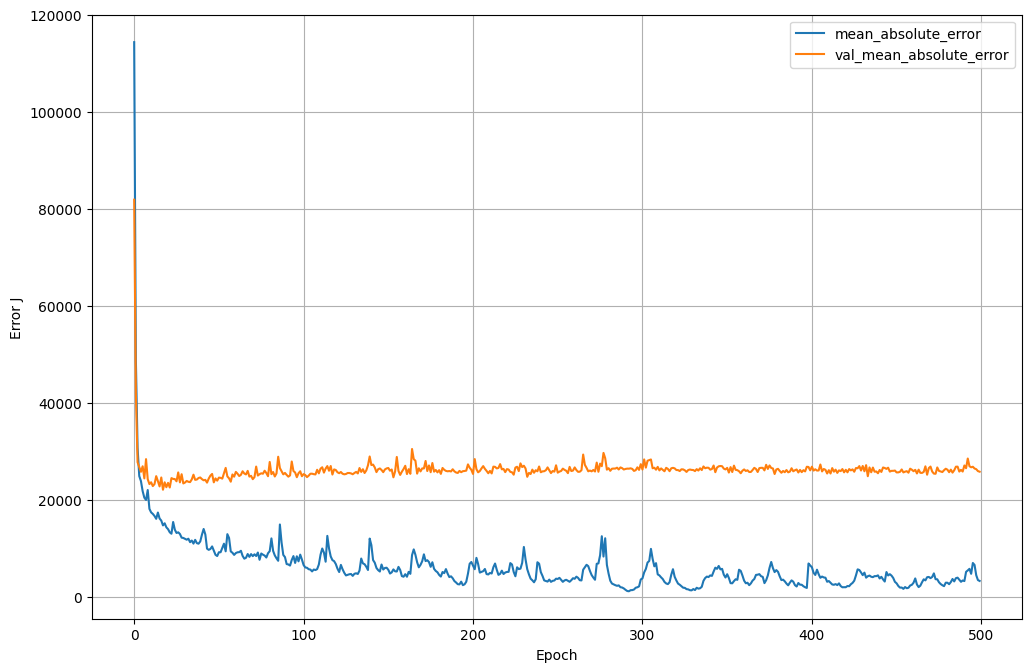

In [33]:
plt.figure(figsize=(12,8), dpi= 100)
plot_loss_custom(history)

In [34]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(train_dataset_X, train_dataset_y, epochs=best_epoch, validation_split=0.2)

Epoch 1/18
30/30 [==============================] - 0s 5ms/step - loss: 20175202304.0000 - mean_absolute_error: 113866.3359 - val_loss: 5724021248.0000 - val_mean_absolute_error: 60941.1289
Epoch 2/18
30/30 [==============================] - 0s 1ms/step - loss: 3914966528.0000 - mean_absolute_error: 45333.1484 - val_loss: 2364782592.0000 - val_mean_absolute_error: 34665.2656
Epoch 3/18
30/30 [==============================] - 0s 1ms/step - loss: 1791483520.0000 - mean_absolute_error: 28620.1973 - val_loss: 1696734336.0000 - val_mean_absolute_error: 29613.1680
Epoch 4/18
30/30 [==============================] - 0s 1ms/step - loss: 1354171776.0000 - mean_absolute_error: 24770.3359 - val_loss: 1377657344.0000 - val_mean_absolute_error: 26807.7324
Epoch 5/18
30/30 [==============================] - 0s 1ms/step - loss: 1149388160.0000 - mean_absolute_error: 21897.1699 - val_loss: 1422751744.0000 - val_mean_absolute_error: 26968.5957
Epoch 6/18
30/30 [==============================] - 0s 2ms

In [35]:
hypermodel.evaluate(test_dataset_X, test_dataset_y)

10/10 [==============================] - 0s 733us/step - loss: 114184421376.0000 - mean_absolute_error: 40952.6172


[114184421376.0, 40952.6171875]

In [147]:
res = hypermodel.predict(test_dataset_X)
res[0]

array([392965.06], dtype=float32)

In [148]:
res = pd.DataFrame(res, dtype='float64')
res

,0
0,392965.062500
1,117298.992188
2,244952.890625
3,244142.625000
4,207542.437500
...,...
287,116708.718750
288,167190.593750
289,127011.039062
290,152246.343750


In [149]:
np.abs(hypermodel.predict(test_dataset_X) - test_dataset_y.values).mean()

91414.11021668729

#### Maxed out Tuner

In [36]:
from tensorboard.plugins.hparams import api as hpapi

In [37]:
def model_builder(hp):
  hp_units = hp.Int('units', min_value = 16, max_value = 128, step=16)
  hp_units_2 = hp.Int('units2', min_value = 16, max_value = 64, step=16)
  HP_DROPOUT_RE = hp.Float('dropout', min_value=0.1, max_value=0.2, step=0.02)

  model = keras.Sequential()
  model.add(normalizer)
  model.add(keras.layers.Dense(units=hp_units, activation ='relu'))
  model.add(keras.layers.Dropout(HP_DROPOUT_RE))
  model.add(keras.layers.Dense(units=hp_units_2, activation ='relu'))
  model.add(keras.layers.Dropout(HP_DROPOUT_RE))
  model.add(keras.layers.Dense(1))

  # model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
#  model.add(keras.layers.Dense(units=hp_units, activation='relu'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 5e-2, 1e-3])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.MeanSquaredError(),
                metrics=['mean_absolute_error'])

  return model

In [40]:
tuner = kt.Hyperband(model_builder,
                     objective='val_mean_absolute_error',
                     max_epochs=500,
                     factor=5,
                     directory='my_dir',
                     project_name='intro_to_hyperkt')

In [41]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=5)


In [42]:
tuner.search(train_dataset_X, train_dataset_y, epochs=500, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 725 Complete [00h 00m 06s]
val_mean_absolute_error: 26624.615234375

Best val_mean_absolute_error So Far: 20955.26953125
Total elapsed time: 00h 16m 54s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 64 and the optimal learning rate for the optimizer
is 0.1.



In [44]:
print(best_hps.get("units"))
print(best_hps.get("units2"))
print(best_hps.get("dropout"))
print(best_hps.get("learning_rate"))

64
64
0.16000000000000003
0.1


In [45]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_dataset_X, train_dataset_y, epochs=128, validation_split=0.2)

Epoch 1/128
30/30 [==============================] - 0s 5ms/step - loss: 24668303360.0000 - mean_absolute_error: 135168.6094 - val_loss: 6846598144.0000 - val_mean_absolute_error: 64685.1719
Epoch 2/128
30/30 [==============================] - 0s 1ms/step - loss: 5053934080.0000 - mean_absolute_error: 49278.0703 - val_loss: 3674756352.0000 - val_mean_absolute_error: 44695.9453
Epoch 3/128
30/30 [==============================] - 0s 1ms/step - loss: 2894169856.0000 - mean_absolute_error: 38103.3828 - val_loss: 2226245632.0000 - val_mean_absolute_error: 31867.3555
Epoch 4/128
30/30 [==============================] - 0s 1ms/step - loss: 2582658560.0000 - mean_absolute_error: 35585.2305 - val_loss: 1712625024.0000 - val_mean_absolute_error: 29428.3945
Epoch 5/128
30/30 [==============================] - 0s 1ms/step - loss: 1863916416.0000 - mean_absolute_error: 29576.3926 - val_loss: 1438551296.0000 - val_mean_absolute_error: 27150.4941
Epoch 6/128
30/30 [==============================] - 

30/30 [==============================] - 0s 1ms/step - loss: 725160192.0000 - mean_absolute_error: 20220.1133 - val_loss: 1103348736.0000 - val_mean_absolute_error: 23562.7227
Epoch 88/128
30/30 [==============================] - 0s 2ms/step - loss: 1134940800.0000 - mean_absolute_error: 23826.5938 - val_loss: 1386009856.0000 - val_mean_absolute_error: 26132.0215
Epoch 89/128
30/30 [==============================] - 0s 2ms/step - loss: 1020225216.0000 - mean_absolute_error: 22786.2090 - val_loss: 1025379328.0000 - val_mean_absolute_error: 22321.7051
Epoch 90/128
30/30 [==============================] - 0s 2ms/step - loss: 932635136.0000 - mean_absolute_error: 22543.5098 - val_loss: 1014581184.0000 - val_mean_absolute_error: 22540.1582
Epoch 91/128
30/30 [==============================] - 0s 2ms/step - loss: 866085632.0000 - mean_absolute_error: 21366.8848 - val_loss: 985526528.0000 - val_mean_absolute_error: 22207.5039
Epoch 92/128
30/30 [==============================] - 0s 2ms/step -

In [48]:
val_acc_per_epoch = history.history['val_mean_absolute_error']
best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

model = tuner.hypermodel.build(best_hps)
history = model.fit(train_dataset_X, train_dataset_y, epochs=best_epoch, validation_split=0.2)

Best epoch: 98
Epoch 1/98
30/30 [==============================] - 0s 5ms/step - loss: 24901310464.0000 - mean_absolute_error: 133437.4844 - val_loss: 6033691648.0000 - val_mean_absolute_error: 60138.0312
Epoch 2/98
30/30 [==============================] - 0s 1ms/step - loss: 4243049216.0000 - mean_absolute_error: 46939.5078 - val_loss: 2190547712.0000 - val_mean_absolute_error: 33883.5938
Epoch 3/98
30/30 [==============================] - 0s 1ms/step - loss: 2822971392.0000 - mean_absolute_error: 36954.8516 - val_loss: 1991819392.0000 - val_mean_absolute_error: 31590.2051
Epoch 4/98
30/30 [==============================] - 0s 1ms/step - loss: 2080462592.0000 - mean_absolute_error: 31952.1758 - val_loss: 1709107072.0000 - val_mean_absolute_error: 29452.3965
Epoch 5/98
30/30 [==============================] - 0s 2ms/step - loss: 1842462976.0000 - mean_absolute_error: 30486.8320 - val_loss: 1419250048.0000 - val_mean_absolute_error: 28307.5957
Epoch 6/98
30/30 [=========================

Epoch 88/98
30/30 [==============================] - 0s 1ms/step - loss: 801890304.0000 - mean_absolute_error: 21223.4609 - val_loss: 1100207104.0000 - val_mean_absolute_error: 22874.1621
Epoch 89/98
30/30 [==============================] - 0s 2ms/step - loss: 895623296.0000 - mean_absolute_error: 21802.6953 - val_loss: 1271827840.0000 - val_mean_absolute_error: 24955.0996
Epoch 90/98
30/30 [==============================] - 0s 2ms/step - loss: 886359808.0000 - mean_absolute_error: 21144.8223 - val_loss: 1095920512.0000 - val_mean_absolute_error: 23650.3320
Epoch 91/98
30/30 [==============================] - 0s 2ms/step - loss: 792703552.0000 - mean_absolute_error: 20482.2246 - val_loss: 1599358080.0000 - val_mean_absolute_error: 29476.8438
Epoch 92/98
30/30 [==============================] - 0s 2ms/step - loss: 956097152.0000 - mean_absolute_error: 23366.1699 - val_loss: 1248289664.0000 - val_mean_absolute_error: 25768.5820
Epoch 93/98
30/30 [==============================] - 0s 2ms/

In [51]:
print(np.abs(model.predict(test_dataset_X) - test_dataset_y.values).mean())
print(model.evaluate(test_dataset_X, test_dataset_y))

85555.52091463719
10/10 [==============================] - 0s 772us/step - loss: 56485728256.0000 - mean_absolute_error: 36204.1172
[56485728256.0, 36204.1171875]
